## Домашняя работа 3

### VK API

Установите библиотеку [vk](https://github.com/dimka665/vk) для работы с VK API в Python:

** pip install vk **

Импортируйте данную библиотеку: 

In [1]:
import vk

После установки модуля, необходимо [создать приложение на сайте VK](https://vk.com/dev/native_create)

После регистрации приложения, понадобится только его **ID**. Его можно найти во вкладке **Настройки**.

Теперь создайте файл credentials.py (подобно тому, которой мы создавали на семинаре 8), который должен выглядеть следующим образом:

Авторизуйтесь:

In [2]:
from credentials import *

session = vk.AuthSession(id_app, login, password)

2018-03-04 22:08:05,007 vk    mixins:127 INFO: Getting permissions


При такой авторизации нужно указывать не только логин, пароль и ID приложения, но и то, к чему мы хотим получить доступ. Для того чтобы данный код сработал корректно, при авторизации нужно указать дополнительно аргумент с названием scope и перечислить через запятую те методы, доступ к которым мы хотим получить. Например:

In [3]:
session = vk.AuthSession(id_app, login, password, scope='wall')
vk_api = vk.API(session)

2018-03-04 22:08:05,720 vk    mixins:127 INFO: Getting permissions


В данном примере я запрашиваю доступ к стене. Названия методов, к которым возможно получить доступ можно посмотреть на [этой странице документации](https://vk.com/dev/objects).

**Задача 1. Формирование корпуса текстов** (10 баллов) 

Найдите две или более группы, которые публикуют достаточно содержательные посты (например, новости и т.п.). Тематика групп должна быть различной. 

С помощью [wall.get](https://vk.com/dev/wall.get) скачайте посты данных групп и сформируйте корпуса текстов, используя возможности [pandas](https://pythonspot.com/category/pandas/).

In [4]:
text_hse_list = [] #здесь будут храниться 300 текстов из https://vk.com/thevyshka

In [5]:
text_hse_100 = vk_api.wall.get(owner_id='-66036248', count='100', version='5.73')

In [6]:
text_hse_200 = vk_api.wall.get(owner_id='-66036248', offset='100', count='100', version='5.73')

In [7]:
text_hse_300 = vk_api.wall.get(owner_id='-66036248', offset='200', count='100', version='5.73')

In [8]:
for i in range(1, 101):
    text_hse_list.append(text_hse_100[i]['text'])

In [9]:
for i in range(1, 101):
    text_hse_list.append(text_hse_200[i]['text'])

In [10]:
for i in range(1, 101):
    text_hse_list.append(text_hse_300[i]['text'])

In [11]:
text_kasp_list = [] #здесь будут храниться 300 текстов из https://vk.com/kaspercareer

In [12]:
text_kasp_100 = vk_api.wall.get(owner_id='-98006063', count='100', version='5.73')
text_kasp_200 = vk_api.wall.get(owner_id='-98006063', offset='100', count='100', version='5.73')
text_kasp_300 = vk_api.wall.get(owner_id='-98006063', offset='200', count='100', version='5.73')

In [13]:
for i in range(1, 101):
    text_kasp_list.append(text_kasp_100[i]['text'])
for i in range(1, 101):
    text_kasp_list.append(text_kasp_200[i]['text'])
for i in range(1, 101):
    text_kasp_list.append(text_kasp_300[i]['text'])

**Задача 2. Предобработка ** (15 баллов)

Предобработайте корпуса текстов: 
* Очистите тексты от мусора, используя [регулярные выражения](https://docs.python.org/2/library/re.html)
* [Лемматизируйте текст](https://github.com/arinaaageeva/Lemmatization)
* Удалите стоп-слова

Список стоп-слов можно получить с помощью модуля [stop-words](https://pypi.python.org/pypi/stop-words)

In [14]:
import re

In [15]:
def clear(text):
    text = re.sub(r'#[^ ]*', '', text) #убираем хэштеги
    text = re.sub(r'http[^ ]*', '', text) #убираем ссылки
    text = re.sub(r'vk[^ ]*', '', text)
    text = re.sub(r'goo[^ ]*', '', text)
    text = re.sub(r'itunes[^ ]*', '', text)
    text = re.sub(r'\d', '', text) #убираем цифры
    text = text.lower()
    text = re.sub(r'<[^ ]*', '', text) #убираем <br> и т.п.
    text = re.findall(r'\w+', text)
    return text

In [16]:
hse_text_clear = [clear(text) for text in text_hse_list]
hse_texts_clear = [' '.join(text) for text in hse_text_clear]

In [17]:
kasp_text_clear = [clear(text) for text in text_kasp_list]
kasp_texts_clear = [' '.join(text) for text in kasp_text_clear]

In [18]:
import pymorphy2

In [19]:
import nltk
from nltk.tokenize import word_tokenize

In [20]:
morph = pymorphy2.MorphAnalyzer()

In [21]:
hse_texts_lemma = []
kasp_texts_lemma = []

In [22]:
for text in hse_texts_clear:
    hse_text_lemma = ' '.join([morph.parse(token)[0].normal_form for token in word_tokenize(text)])
    hse_texts_lemma.append(hse_text_lemma)

In [23]:
for text in kasp_texts_clear:
    kasp_text_lemma = ' '.join([morph.parse(token)[0].normal_form for token in word_tokenize(text)])
    kasp_texts_lemma.append(kasp_text_lemma)

In [24]:
import stop_words
from stop_words import get_stop_words

stop_words_ru = get_stop_words('ru')
stop_words_en = get_stop_words('en')
sw = set(stop_words_ru) & set(stop_words_en)

In [25]:
def no_stop_words(texts, stop):
    return [[word for word in text.split(' ') if word not in stop] for text in texts]

In [26]:
hse_texts_nostop = no_stop_words(hse_texts_lemma, sw)
hse_texts_final = [' '.join(word) for word in hse_texts_nostop] #финальный корпус для the вышка
kasp_texts_nostop = no_stop_words(kasp_texts_lemma, sw)
kasp_texts_final = [' '.join(word) for word in kasp_texts_nostop] #финальный корпус для касперского

In [27]:
hse_texts_final

['вышка весь неделя обсуждать как и сколько пгас распилить студенческий совет если вы потеряться и не знаете о чем речь собрать для вы самый подробный путеводитель по мир скандальный расследование петиция отставка комментарий и взаимный обвинение в состояться заседание студенческий совет приходить чтобы задать неудобный вопрос самоуправление и следить за наш трансляция добавить ещё пара ваш любимый лонгрид подъехать позиция дирекция по развитие студенческий потенциал и ответ волонтёрский центр ульян шахрай',
 'постепенно приходить весна а вместе с она свежий околовшэвский новость за неделя совет провести заседание по проблема распределение пгаснуть на который омбудсмен никита шабан покинуть пост а представитель три локальный студсовет отказаться от сотрудничество с бсс запускать программа наставничество в рамка который выпускник смочь поделиться с студент профессиональный опыт и помочь имя успешно войти в отрасль бизнес инкубатор вшэ он занять место в мировой топ университетский инкуба

** Задача 3. Выделение признаков** (5 баллов)

Воспользуйтесь [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) для векторизации текстов. 

Сначала нужно создать и обучить vectorizer:

```

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=<сюда передайте список стоп слов>).fit(<сюда передайте весь корпус текстов>)
```

Что бы преообразовать тексты в векторное представление используйте метод transform:
```
tfidf_vectors = vectorizer.transform(<список текстов>)
```
Получение списка имён признаков:
```
features_names = vectorizer.get_features_name()
```
Для каждой группы получите список топ-токенов и выведите .

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer_hse = TfidfVectorizer(stop_words=stop_words_ru).fit(hse_texts_final)

In [30]:
tfidf_vectors_hse = vectorizer_hse.transform(hse_texts_final)

In [31]:
features_names_hse = vectorizer_hse.get_feature_names()

In [32]:
vectorizer_kasp = TfidfVectorizer(stop_words=stop_words_ru).fit(kasp_texts_final)

In [33]:
tfidf_vectors_kasp = vectorizer_kasp.transform(kasp_texts_final)

In [34]:
features_names_kasp = vectorizer_kasp.get_feature_names()

**Задача 4. Визуализация** (5 баллов)

Визуализируйте токены для каждого сообщества с помощью [WORDCLOUD](https://python-graph-gallery.com/wordcloud/)

In [35]:
import wordcloud

import matplotlib.pyplot as plt


In [36]:
help(wordcloud.wordcloud)

Help on module wordcloud.wordcloud in wordcloud:

NAME
    wordcloud.wordcloud

DESCRIPTION
    # Author: Andreas Christian Mueller <t3kcit@gmail.com>
    #
    # (c) 2012
    # Modified by: Paul Nechifor <paul@nechifor.net>
    #
    # License: MIT

CLASSES
    builtins.object
        IntegralOccupancyMap
        WordCloud
        colormap_color_func
    
    class IntegralOccupancyMap(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self, height, width, mask)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  sample_position(self, size_x, size_y, random_state)
     |  
     |  update(self, img_array, pos_x, pos_y)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
    
  

In [37]:
WC = wordcloud.wordcloud.WordCloud

In [38]:
wc = WC(width=480, height=480, margin=0).generate(' '.join(features_names_hse))

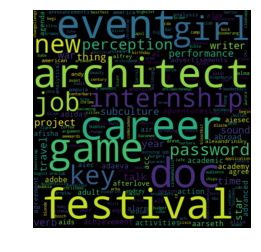

In [39]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [40]:
wc2 = WC(width=480, height=480, margin=0).generate(' '.join(features_names_kasp))

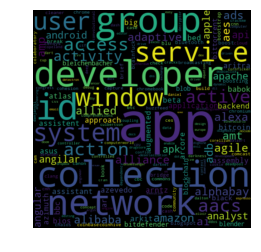

In [41]:
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Задача 5. Поиск коллокаций** (15 баллов)

Для каждого сообщества найдите статистические значиммые коллокации с помощью PMI